# Graph theory with Networkx

Aitor Morales-Gregorio

*Python Module of the Week* on the 29.12.2019 @ INM-6 

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/99/Cc-by-nc_icon.svg/1920px-Cc-by-nc_icon.svg.png" width="80" height="80" align="left" />

## Installation
At best in a fresh environment with python3 and matplotlib:
```
conda env create -n nx python=3 matplotlib
pip install networkx
```

You can also use the environment file in this repository 'env_nx.yml' and create your environment simply by:
```
conda env create -f env_nx.yml
```
And activate it:
```
conda activate nx
```

## Intro

The following basic graph types are provided as Python classes:

`Graph`

This class implements an undirected graph. It ignores multiple edges between two nodes. It does allow self-loop edges between a node and itself.

`DiGraph`

Directed graphs, that is, graphs with directed edges. Provides operations common to directed graphs, (a subclass of Graph).

`MultiGraph`

A flexible graph class that allows multiple undirected edges between pairs of nodes. The additional flexibility leads to some degradation in performance, though usually not significant.

`MultiDiGraph`

A directed version of a MultiGraph.


## Creating a graph from zero

This tutorial partially follows the tutorials in the official NetworkX  [documentation](https://networkx.github.io/documentation/stable/tutorial.html) (which is very good!)

### Undirected graphs

In [3]:
import networkx as nx

In [4]:
import matplotlib.pyplot as plt
from random import randint
from pprint import pprint

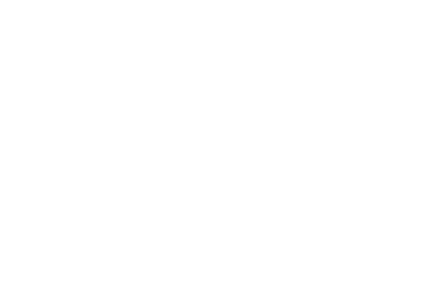

In [187]:
# Let's create a fresh network!
G = nx.Graph()
nx.draw(G)

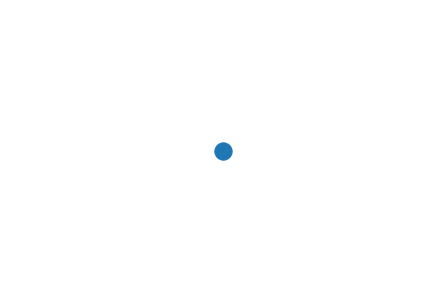

In [188]:
# You can add a node like so
G.add_node(1)
nx.draw(G)

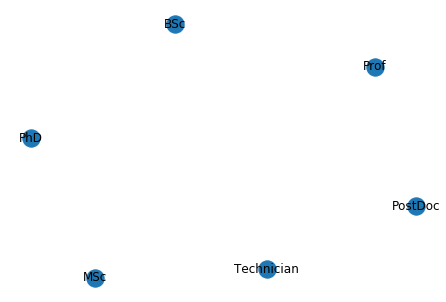

In [189]:
# Or you can add other more meaningful nodes all from a list
G.clear()
G.add_nodes_from(['BSc', 'MSc', 'PhD', 'PostDoc', 'Prof', 'Technician'])
nx.draw(G, with_labels=True)

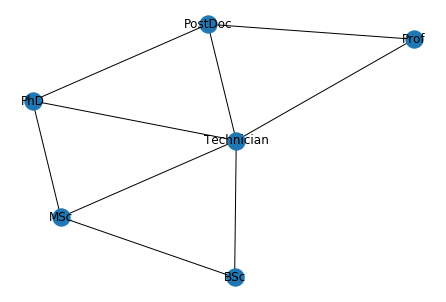

In [190]:
# Adding edges is pretty much the same, just with tuples instead of single values
G.add_edge('BSc', 'MSc')
G.add_edges_from([('MSc', 'PhD'), ('PhD', 'PostDoc'), ('PostDoc', 'Prof')])
for node in list(G.nodes):
    G.add_edge('Technician', node)
nx.draw(G, with_labels=True)

In [191]:
# One can get the adjacency matrix
A = nx.adjacency_matrix(G)
print('-- This is a Scipy sparse matrix:\n')
print(A)

print('\n-- This is a numpy matrix:\n')
print(A.todense())

-- This is a Scipy sparse matrix:

  (0, 1)	1
  (0, 5)	1
  (1, 0)	1
  (1, 2)	1
  (1, 5)	1
  (2, 1)	1
  (2, 3)	1
  (2, 5)	1
  (3, 2)	1
  (3, 4)	1
  (3, 5)	1
  (4, 3)	1
  (4, 5)	1
  (5, 0)	1
  (5, 1)	1
  (5, 2)	1
  (5, 3)	1
  (5, 4)	1
  (5, 5)	1

-- This is a numpy matrix:

[[0 1 0 0 0 1]
 [1 0 1 0 0 1]
 [0 1 0 1 0 1]
 [0 0 1 0 1 1]
 [0 0 0 1 0 1]
 [1 1 1 1 1 1]]


In [192]:
# Degree
list(G.degree())

[('BSc', 2),
 ('MSc', 3),
 ('PhD', 3),
 ('PostDoc', 3),
 ('Prof', 2),
 ('Technician', 7)]

In [22]:
# Clustering coefficient
nx.clustering(G)

{'1': 0.8064935064935065,
 '2': 0.8064935064935065,
 '3a': 0.8155136268343816,
 '3b': 0.8207547169811321,
 '4': 0.9347826086956522,
 '5': 0.8771929824561403,
 '6': 0.9285714285714286,
 '7a': 0.8044217687074829,
 '7b': 0.8512195121951219,
 '46': 0.883855981416957,
 'FEF': 0.8134680134680135,
 'Id': 0.8,
 'Ig': 0.7963800904977375,
 'Ri': 0.8,
 'SEF': 0.8109803921568628,
 'SII': 0.816400580551524,
 'SMA': 0.806429070580014,
 'MDP': 0.8866396761133604,
 'MIP': 0.8556891766882516,
 'PO': 0.8695121951219512,
 'VIP': 0.8584643848288621,
 '35': 0.8545454545454545,
 '36': 0.851207729468599,
 'AITd': 0.9174603174603174,
 'AITv': 0.9378151260504202,
 'CIT': 0.8438914027149321,
 'CITd': 0.9122807017543859,
 'CITv': 0.9036004645760743,
 'DP': 0.8596938775510204,
 'FST': 0.8715986394557823,
 'IT': 0.8171428571428572,
 'LIP': 0.8519503546099291,
 'MST': 0.8315863032844165,
 'MSTd': 0.8769657724329325,
 'MSTl': 0.9036544850498339,
 'MT': 0.8391836734693877,
 'PIP': 0.9097560975609756,
 'PIT': 0.904761

In [194]:
# Betweenness centrality
nx.betweenness_centrality(G)

{'BSc': 0.0,
 'MSc': 0.05,
 'PhD': 0.05,
 'PostDoc': 0.05,
 'Prof': 0.0,
 'Technician': 0.45}

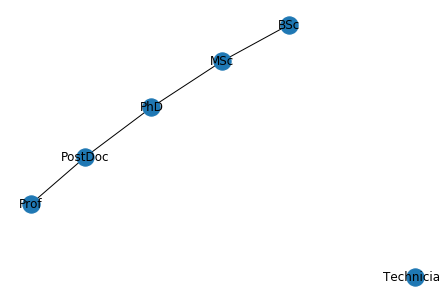

{0: 1.0, 1: 1.0}

In [206]:
# Rich club coefficient
## nx.rich_club_coefficient(G) --> ERROR: Not implemented for graphs with self loops

# I destroy edges by removing the node
G.remove_node('Technician')
G.add_node('Technician')

nx.draw(G, with_labels=True)
plt.show()
nx.rich_club_coefficient(G)

[Link](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.richclub.rich_club_coefficient.html#networkx.algorithms.richclub.rich_club_coefficient)  to documentation of rich club coefficient function 

### Weighted graphs

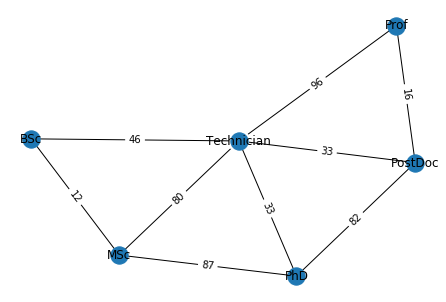

In [46]:
WG = nx.Graph()
WG.add_nodes_from(['BSc', 'MSc', 'PhD', 'PostDoc', 'Prof', 'Technician'])
'''
Any keyword argument passed to an edge can be treated as a weight
'''
WG.add_edge('BSc', 'MSc', friendliness=randint(10, 99))
WG.add_edge('MSc', 'PhD', friendliness=randint(10, 99))
WG.add_edge('PhD', 'PostDoc', friendliness=randint(10, 99))
WG.add_edge('PostDoc', 'Prof', friendliness=randint(10, 99))

for node in list(WG.nodes):
    WG.add_edge('Technician', node, friendliness=randint(10, 99))

'''
One can define at which position each node should be plotted
This can be done manually when creating the nodes:
>>> G.add_node(label, pos=(x,y))
...
>>> pos = nx.get_node_attributes(G, 'pos')

Or much more conveniently, using some optimized algorithm like
>> nx.spring_layout(G)
'''
pos = nx.spring_layout(WG)    

nx.draw(WG, pos, with_labels=True)

# Additionally we can print the edge weights
labels = nx.get_edge_attributes(WG,'friendliness')
foo = nx.draw_networkx_edge_labels(WG, pos, edge_labels=labels)

In [57]:
# Degree
print('Degrees of unweighted graph:')
pprint(list(WG.degree()))

print('\nDegrees of weighted graph (a.k.a. intensity):')
pprint(list(WG.degree(weight='friendliness')))

Degrees of unweighted graph:
[('BSc', 2),
 ('MSc', 3),
 ('PhD', 3),
 ('PostDoc', 3),
 ('Prof', 2),
 ('Technician', 7)]

Degrees of weighted graph (a.k.a. intensity):
[('BSc', 58),
 ('MSc', 179),
 ('PhD', 202),
 ('PostDoc', 131),
 ('Prof', 112),
 ('Technician', 372)]


In [58]:
# Clustering coefficient
print('Clustering of unweighted graph:')
pprint(nx.clustering(WG))

print('\nClustering of weighted graph:')
pprint(nx.clustering(WG, weight='friendliness'))

Clustering of unweighted graph:
{'BSc': 1.0,
 'MSc': 0.6666666666666666,
 'PhD': 0.6666666666666666,
 'PostDoc': 0.6666666666666666,
 'Prof': 1.0,
 'Technician': 0.4}

Clustering of weighted graph:
{'BSc': 0.36818983010015055,
 'MSc': 0.33537171016003287,
 'PhD': 0.36784047054186414,
 'PostDoc': 0.28370050955917986,
 'Prof': 0.38550541743189515,
 'Technician': 0.1857216659157638}


### Directed graphs

To create a directed graph you have to use:

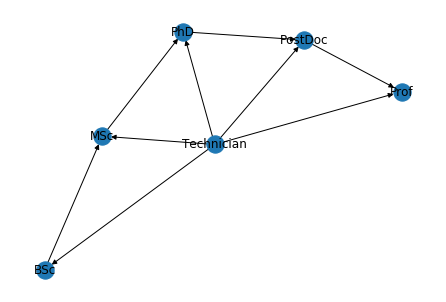

In [207]:
# The only difference is that the new graph is an instance of nx.DiGraph instead of nx.Graph
DG = nx.DiGraph()
DG.add_nodes_from(['BSc', 'MSc', 'PhD', 'PostDoc', 'Prof', 'Technician'])
'''
When generating edges:
* Source: first tuple element
* Target: second tuple element
'''
DG.add_edges_from([('BSc', 'MSc'), ('MSc', 'PhD'), ('PhD', 'PostDoc'), ('PostDoc', 'Prof')])
for node in list(G.nodes):
    DG.add_edge('Technician', node)
nx.draw(DG, with_labels=True)

## Creating a random (directed) graph

NetworkX offers a ton of [graph generating functions](https://networkx.github.io/documentation/networkx-2.3/reference/generators.html)!

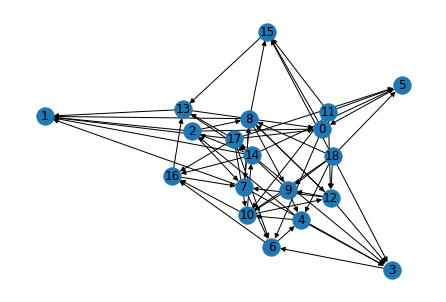

 Documentation for nx.fast_gnp_random_graph
Returns a $G_{n,p}$ random graph, also known as an Erdős-Rényi graph or
    a binomial graph.

    Parameters
    ----------
    n : int
        The number of nodes.
    p : float
        Probability for edge creation.
    seed : integer, random_state, or None (default)
        Indicator of random number generation state.
        See :ref:`Randomness<randomness>`.
    directed : bool, optional (default=False)
        If True, this function returns a directed graph.

    Notes
    -----
    The $G_{n,p}$ graph algorithm chooses each of the $[n (n - 1)] / 2$
    (undirected) or $n (n - 1)$ (directed) possible edges with probability $p$.

    This algorithm [1]_ runs in $O(n + m)$ time, where `m` is the expected number of
    edges, which equals $p n (n - 1) / 2$. This should be faster than
    :func:`gnp_random_graph` when $p$ is small and the expected number of edges
    is small (that is, the graph is sparse).

    See Also
    --------
    g

In [204]:
# A more realistic network
G_r = nx.fast_gnp_random_graph(n=19, p=0.2, seed=None, directed=True)
nx.draw(G_r, with_labels=True)
plt.show()
print("\033[1m Documentation for nx.fast_gnp_random_graph\033[0m")
print(nx.fast_gnp_random_graph.__doc__)

In [205]:
# Adjacency matrix
A = nx.adjacency_matrix(G_r)
print('\n-- This is a numpy matrix:\n')
print(A.todense())


-- This is a numpy matrix:

[[0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0]
 [0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0]
 [0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0]
 [1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0]
 [1 1 0 0 0 1 1 0 0 0 1 0 0 1 1 0 1 0 0]
 [0 0 0 1 1 1 0 0 1 1 1 0 1 0 0 1 0 0 0]]


## USE CASE: CoCoMac tract-tracing connectivity data

Networkx offers a wide variety of IO functions for most standard formats:
* Supported formats: JSON, pickle, YAML... (other graph specific formats)
* Not suported formats: CSV, HDF, NPY

See all the possibilities for [IO in the documentation](https://networkx.github.io/documentation/stable/reference/readwrite/index.html#readwrite)

This section shows an example of how to load long-range connectivity data (given as a .json file) using pandas.

In [1]:
import pandas as pd
df = pd.read_json('cocomac.json')
df.head()

,1,2,3a,3b,4,5,6,7a,7b,46,...,V3a,V4,V4d,V4t,V4v,VOT,VP,TF,TH,AIT
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
3a,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
3b,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN


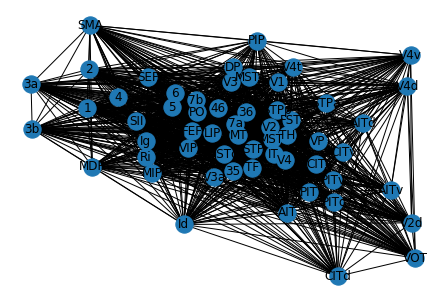

In [9]:
G = nx.convert_matrix.from_pandas_adjacency(df)
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)

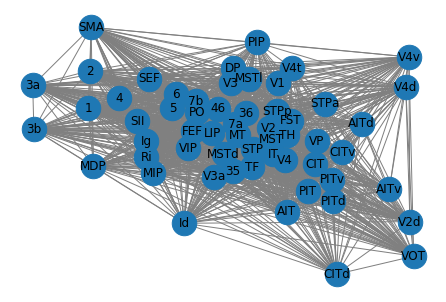

In [16]:
# One can also change the drawing style of course
nx.draw(G, pos, with_labels=True, node_size=600, edge_color='gray')
plt.show()

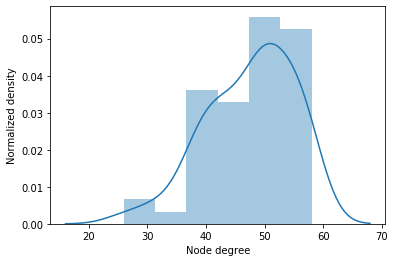

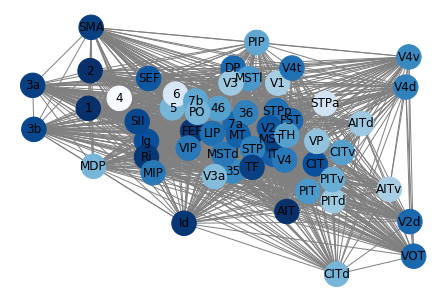

In [10]:
import seaborn as sns
degrees = [d for n, d in G.degree()]
sns.distplot(degrees)
plt.ylabel('Normalized density')
plt.xlabel('Node degree')
plt.show()
nx.draw(G, pos, with_labels=True, node_color=degrees, node_size=600, cmap=plt.cm.Blues, edge_color='gray')
plt.show()

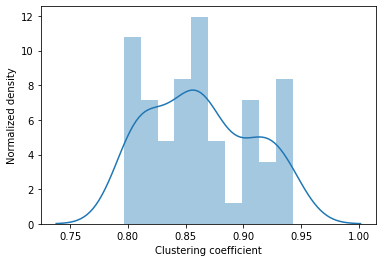

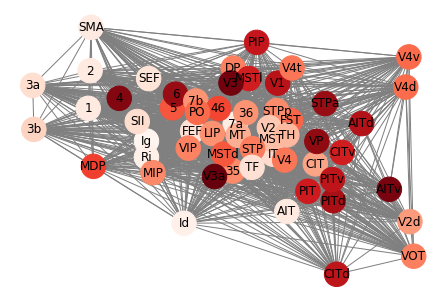

In [12]:
# Clustering coefficient
c_dict = nx.clustering(G)
c_coef = list(c_dict.values())
sns.distplot(c_coef, bins=10)
plt.ylabel('Normalized density')
plt.xlabel('Clustering coefficient')
plt.show()
nx.draw(G, pos, with_labels=True, node_color=c_coef, node_size=600, cmap=plt.cm.Reds, edge_color='gray')
plt.show()

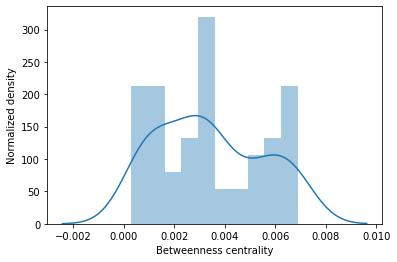

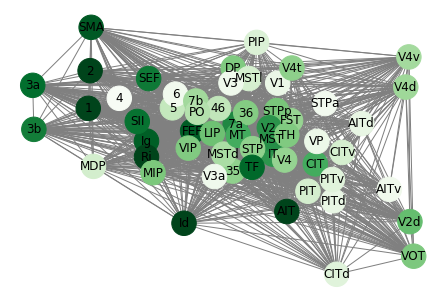

In [13]:
# Betweenness centrality
bc_dict = nx.betweenness_centrality(G)
bc = list(bc_dict.values())
sns.distplot(bc, bins=10)
plt.ylabel('Normalized density')
plt.xlabel('Betweenness centrality')
plt.show()
nx.draw(G, pos, with_labels=True, node_color=bc, node_size=600, cmap=plt.cm.Greens, edge_color='gray')
plt.show()